In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
revenue_df = pd.read_csv('data/creator_revenue.csv')
revenue_df["week_start_date"] = pd.to_datetime(revenue_df["week_start_date"], format="%Y-%m-%d")

# Creator Analysis 

In [64]:
np.unique(revenue_df['creator_id'])

array(['C001', 'C002', 'C003', 'C004'], dtype=object)

Text(0.5, 1.0, 'Revenue Distribution by Creator')

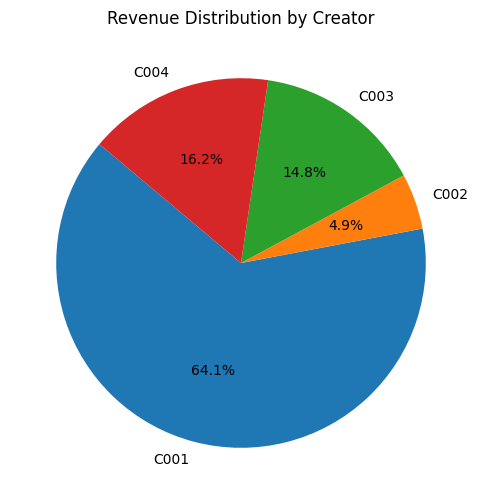

In [65]:
revenue_df['user_start'] = revenue_df.groupby('user_id')['week_start_date'].transform('min')

# Only take weeks 1-5 after user_start
revenue_df['week_num'] = ((revenue_df['week_start_date'] - revenue_df['user_start']).dt.days // 7)
revenue_df_filtered = revenue_df[revenue_df['week_num'].between(1, 5)].copy()

revenue_df_filtered["user_revenue"] = revenue_df_filtered.groupby("user_id")["fee_gbp"].transform("sum").values
creator_revenue = revenue_df_filtered.groupby("creator_id")["user_revenue"].sum()

# Create a pie chart from creator_revenue
plt.figure(figsize=(10, 6))
creator_revenue.plot.pie(autopct='%1.1f%%', startangle=140) # type: ignore
plt.ylabel('')  # Hide y-label
plt.title('Revenue Distribution by Creator')

In [66]:
np.unique(revenue_df_filtered['post_id']).shape

(78,)

# Lead generation analysis

In [67]:
revenue_df_filtered["post_revenue"] = revenue_df_filtered.groupby("post_id")["fee_gbp"].transform("sum")
post_revenue = revenue_df_filtered[["post_id", "post_revenue"]].drop_duplicates()
post_revenue

,post_id,post_revenue
1,PSU16PWSS,314.56
15,PIG2CKRMQ,894.82
29,PA2EIDWGL,404.59
41,PS3TQL1PT,530.26
51,P0VPXQNON,33.66
...,...,...
2459,PHR092RGV,102.11
2634,PESS48W8S,25.61
2713,PN7GN6BO3,20.48
2781,PVWINHOWK,23.23


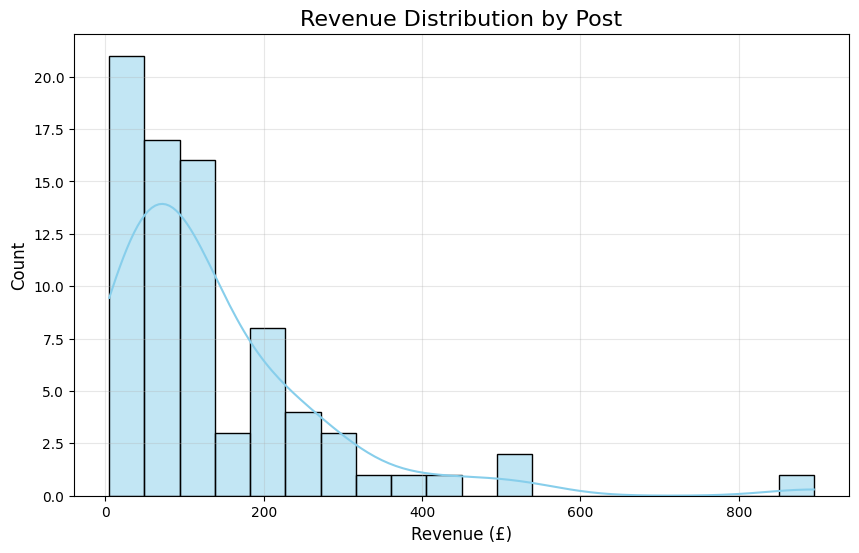

In [68]:
plt.figure(figsize=(10, 6))

# Histogram with seaborn
sns.histplot(post_revenue['post_revenue'], bins=20, kde=True, color='skyblue')  #type: ignore

plt.title('Revenue Distribution by Post', fontsize=16)
plt.xlabel('Revenue (£)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, alpha=0.3)  # subtle grid
plt.show()

In [69]:
content_df = pd.read_csv('data/content_posts.csv')
content_df["platform"] = content_df["platform"].transform(lambda x: x.lower())
content_df["region"] = content_df["region"].transform(lambda x: x.lower())
content_df["content_category"] = content_df["content_category"].transform(lambda x: x.lower())
np.unique(content_df['platform'])

array(['instagram reels', 'tiktok', 'youtube shorts'], dtype=object)

In [70]:
merged_df = pd.merge(post_revenue, content_df, on='post_id', how='inner')
merged_df

,post_id,post_revenue,platform,post_type,creator_id,creator_handle,content_category,published_at,region,video_length_sec,...,ret_75,ret_100,completion_rate,likes,comments,shares,saves,ctr,clicks,outbound_url
0,PSU16PWSS,314.56,tiktok,tiktok,C001,@BaristaBea,taptopay demo,11/04/2025 10:43,uk,8,...,0.559,0.493,0.493,1699,80,233,57,0.01021191378047858,344,https://tapp.link/?utm_source=TikTok&utm_mediu...
1,PIG2CKRMQ,894.82,instagram reels,reel,C001,@BaristaBea,merchant story,2025-03-14 15:47:00,uk,17,...,0.536,0.468,0.468,4837,87,307,402,0.00722,747,https://tapp.link/?utm_source=InstagramReels&u...
2,PA2EIDWGL,404.59,instagram reels,reel,C003,@BakerBella,onboarding guide,1748121518807,uk,29,...,0.696,0.679,0.679,1047,224,513,369,0.81%,486,https://tapp.link/?utm_source=InstagramReels&u...
3,PS3TQL1PT,530.26,instagram reels,reel,C001,@BaristaBea,onboarding guide,2025-05-30 09:30:35,uk,15,...,0.547,0.435,0.435,658,50,30,137,0.010061336919470963,230,https://tapp.link/?utm_source=InstagramReels&u...
4,P0VPXQNON,33.66,tiktok,tiktok,C003,@BakerBella,cost savings,2025-04-12 18:19:27,uk,17,...,0.285,0.214,0.214,889,183,57,95,0.0018459972809571248,84,https://tapp.link/?utm_source=TikTok&utm_mediu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,PHR092RGV,102.11,tiktok,tiktok,C001,@BaristaBea,compliance & security,2025-03-24T19:16:29.978940+00:00Z,uk,31,...,0.484,0.368,0.368,121,41,57,36,0.5%,39,https://tapp.link/?utm_source=TikTok&utm_mediu...
77,PESS48W8S,25.61,youtube shorts,short,C004,@MixologyMax,onboarding guide,2025-07-18T19:46:22.992351+00:00Z,uk,10,...,0.623,0.508,0.508,81,11,15,7,0.008622431898936207,22,https://tapp.link/?utm_source=YouTubeShorts&ut...
78,PN7GN6BO3,20.48,instagram reels,reel,C001,@BaristaBea,ai assistant teaser,2025-07-23 08:18:59,uk,21,...,0.517,0.457,0.457,786,158,305,94,0.38%,177,https://tapp.link/?utm_source=InstagramReels&u...
79,PVWINHOWK,23.23,tiktok,tiktok,C002,@StreetFoodSid,qr ordering,2025-04-06 14:31:59,eu,22,...,0.401,0.317,0.317,2311,331,632,491,0.00225,195,https://tapp.link/?utm_source=TikTok&utm_mediu...


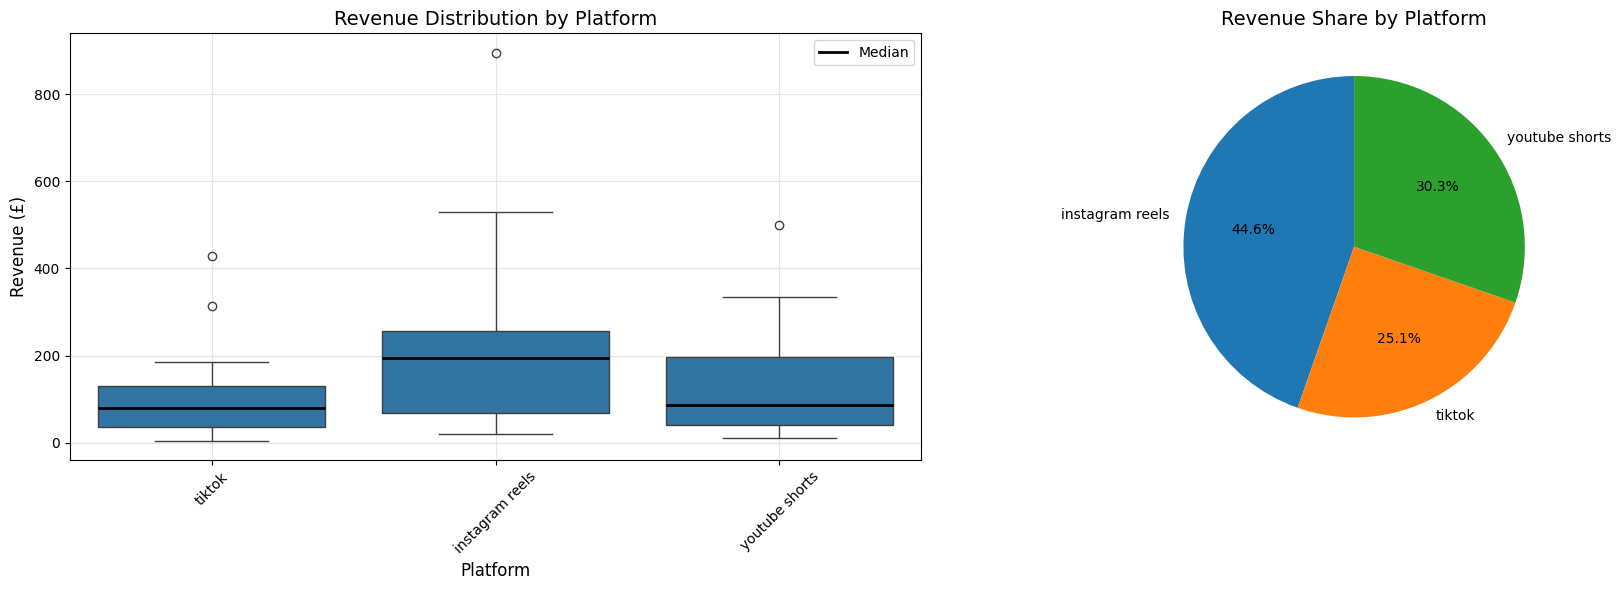

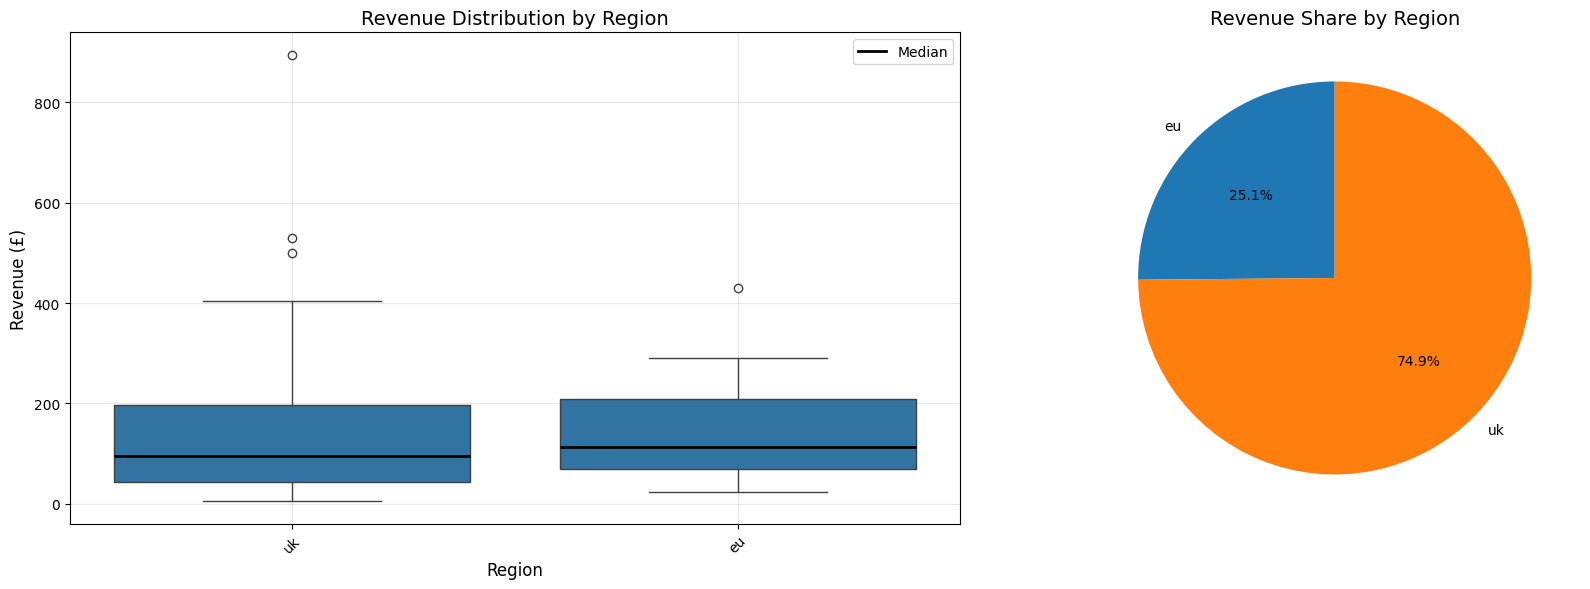

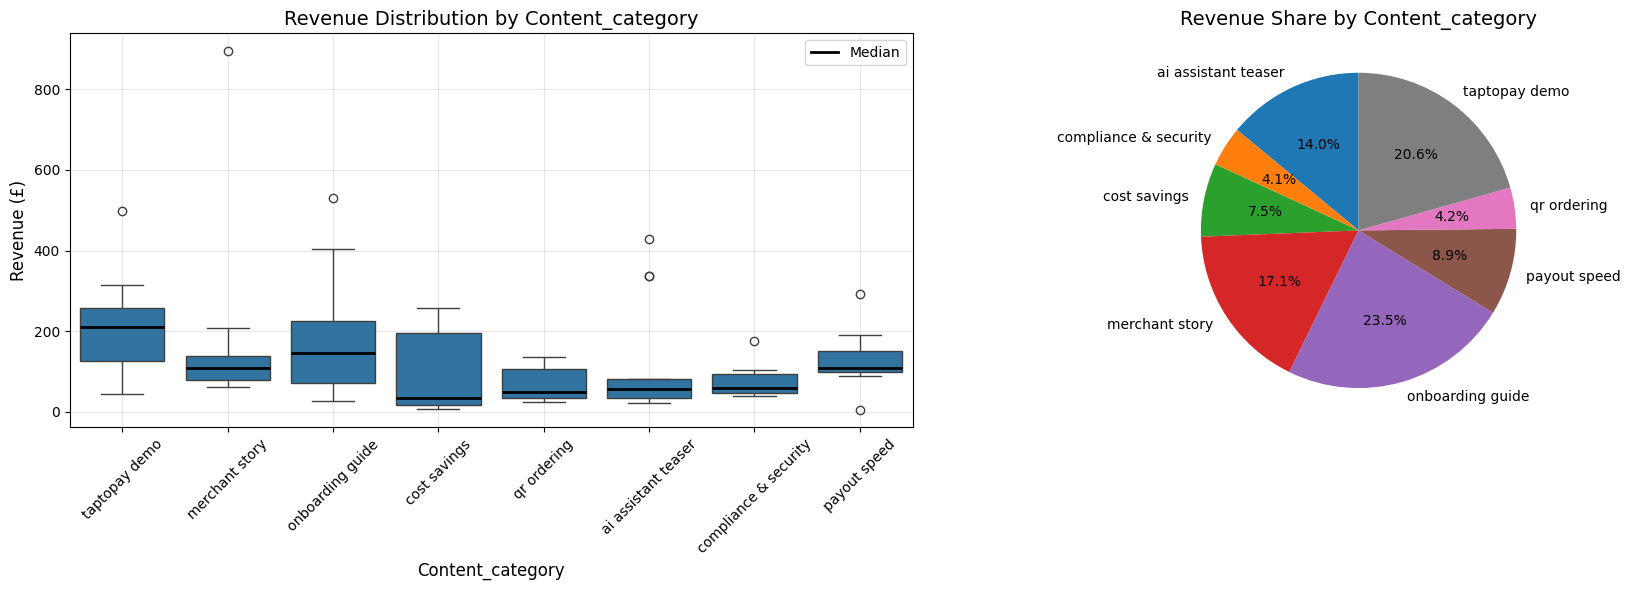

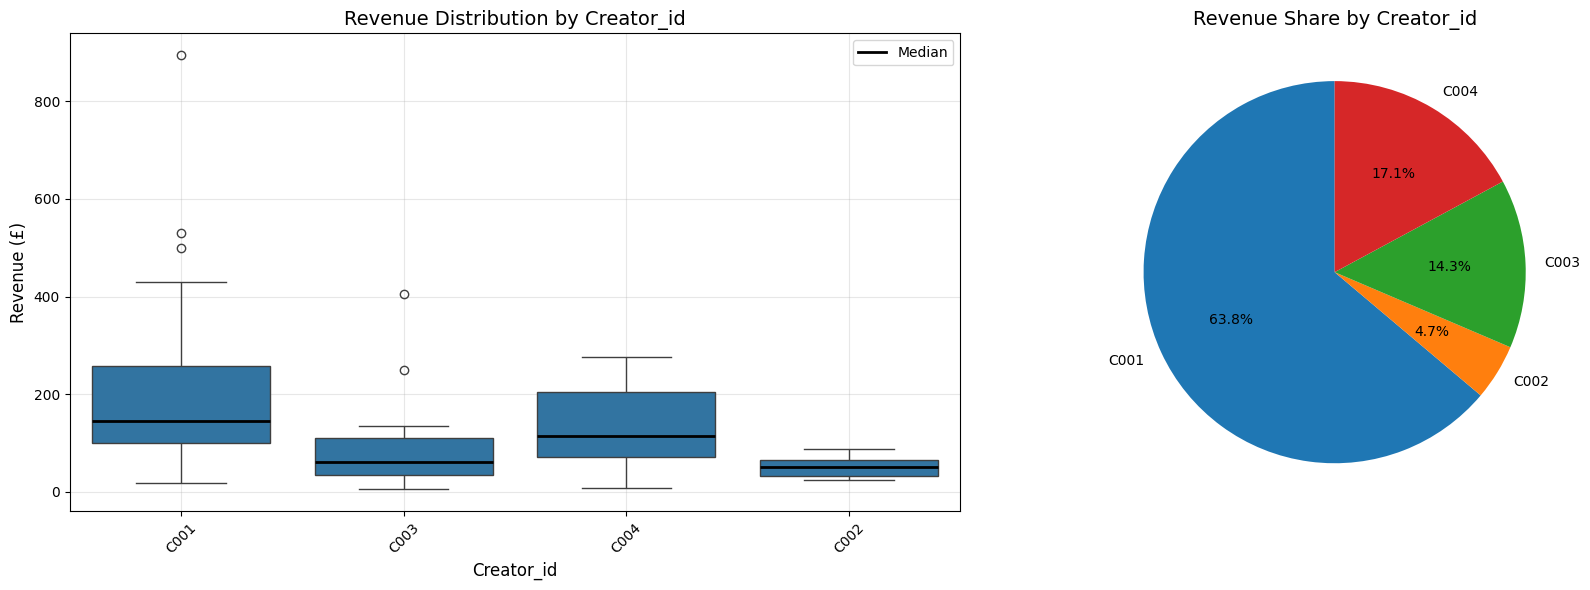

In [71]:
# Example merged_df: columns 'post_revenue' and the categorical columns
categorical_cols = ["platform", "region", "content_category", "creator_id"]

for col in categorical_cols:
    # Aggregate revenue per category for pie chart
    pie_data = merged_df.groupby(col)['post_revenue'].sum()
    
    # Create a figure with 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # Boxplot with median (black) and mean (red dashed)
    sns.boxplot(
        x=col,
        y='post_revenue',
        data=merged_df,
        meanprops={"color":"red", "linestyle":"--", "linewidth":2},
        medianprops={"color":"black", "linewidth":2},
        ax=axes[0]
    )
    axes[0].set_title(f'Revenue Distribution by {col.capitalize()}', fontsize=14)
    axes[0].set_xlabel(col.capitalize(), fontsize=12)
    axes[0].set_ylabel('Revenue (£)', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3)
    
    # Pie chart showing total revenue per category
    pie_data.plot.pie(
        ax=axes[1],
        autopct='%1.1f%%',
        startangle=90,
        legend=False
    )   # type: ignore
    axes[1].set_ylabel('')  # remove default y-label
    axes[1].set_title(f'Revenue Share by {col.capitalize()}', fontsize=14)
    
    # Add manual legend for boxplot mean and median
    axes[0].legend(
        handles=[
            plt.Line2D([0], [0], color='black', linewidth=2, label='Median'),   # type: ignore
        ]
    )
    
    plt.tight_layout()
    plt.show()


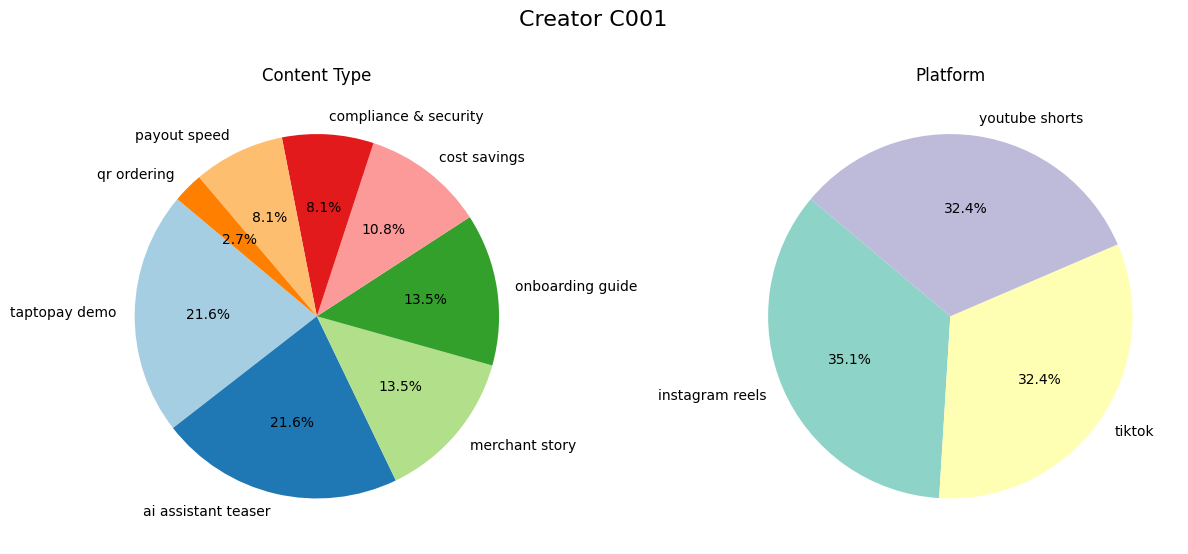

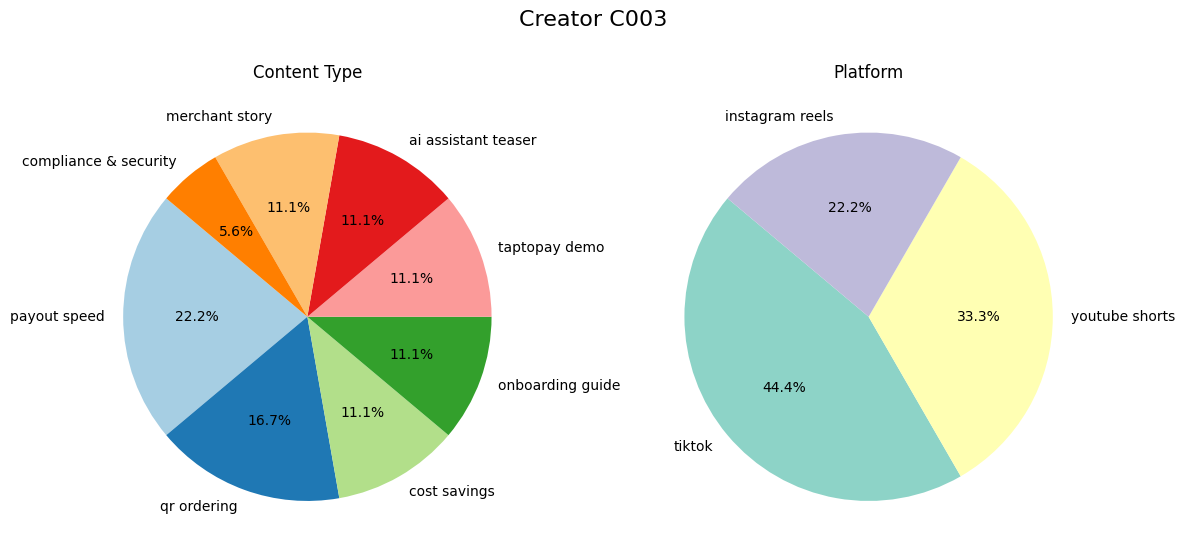

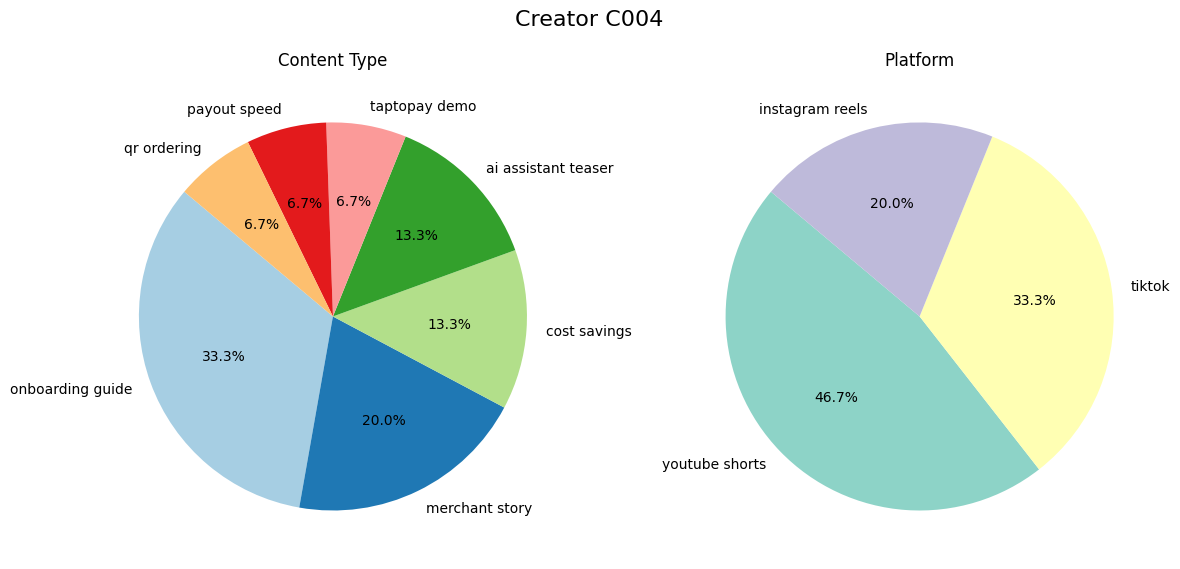

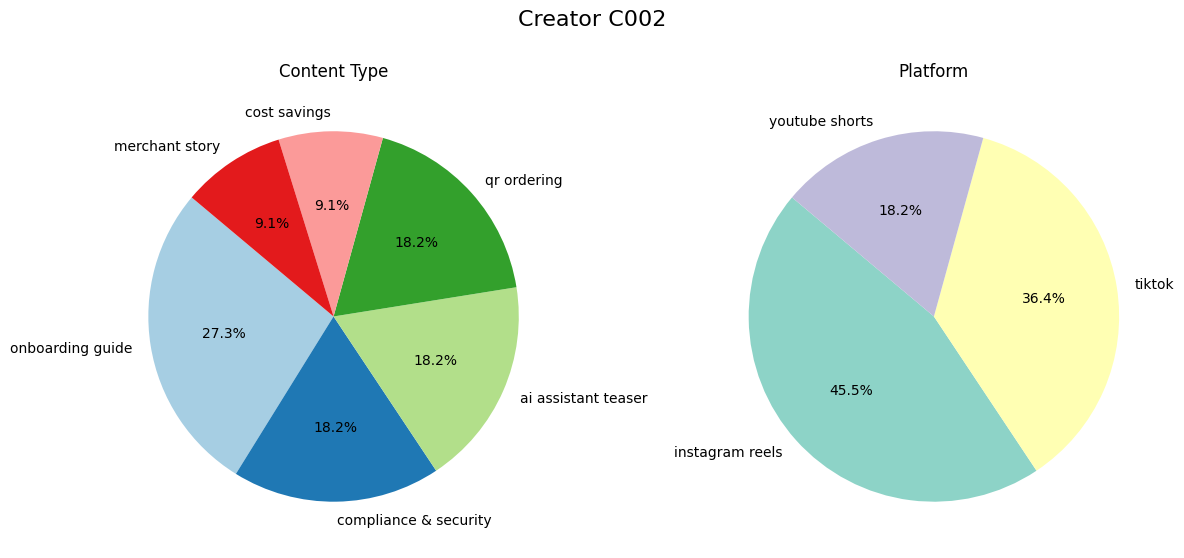

In [72]:
creators = merged_df['creator_id'].unique()

for creator in creators:
    df_creator = merged_df[merged_df['creator_id'] == creator]
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f"Creator {creator}", fontsize=16)
    
    # Pie chart for content type
    df_creator['content_category'].value_counts().plot.pie(
        ax=axes[0],
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors  #type: ignore
    )
    axes[0].set_ylabel('')
    axes[0].set_title('Content Type')
    
    # Pie chart for platform
    df_creator['platform'].value_counts().plot.pie(
        ax=axes[1],
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Set3.colors   #type: ignore
    )
    axes[1].set_ylabel('')
    axes[1].set_title('Platform')
    
    plt.tight_layout()
    plt.show()


# Signup funnel analysis

In [73]:
funnel_df = pd.read_csv('data/signup_funnel.csv')
np.unique(funnel_df['event'])

array(['first_payment', 'first_payout', 'kyc_abandoned', 'kyc_complete',
       'kyc_start', 'profile_view', 'signup', 'signup_abandoned'],
      dtype=object)

In [74]:
event_counts = funnel_df['event'].value_counts()
event_counts["started_signup"] = event_counts.get("signup") + event_counts.get("signup_abandoned")   # type: ignore
percentages = (event_counts / event_counts.get("profile_view") * 100).round(1)   # type: ignore
percentages = percentages.rename(index={"signup": "completed_signup"})    # type: ignore
print(percentages.sort_values(ascending=False))

event
profile_view        100.0
started_signup       30.6
completed_signup     18.6
kyc_complete         13.4
kyc_start            13.4
signup_abandoned     12.0
first_payment         7.5
kyc_abandoned         5.2
first_payout          4.2
Name: count, dtype: float64


In [75]:
fail_counts = funnel_df['failure_reason'].value_counts()
(fail_counts / fail_counts.sum() * 100).round(1)

failure_reason
timeout           31.6
email_invalid     23.0
captcha_fail      22.3
user_cancelled     8.1
doc_mismatch       8.1
unknown            6.9
Name: count, dtype: float64

Group users into categories:

1. Only viewed profile - profile_view
2. Canceled signup - signup_abandoned
3. Kyc abandoned - kyc_abandoned
4. Kyc completed, no first payment
5. First payment, no first payout
6. Complete funnel

In [76]:
percentages = percentages.drop(["kyc_start", "signup_abandoned", "kyc_abandoned"])
percentages.sort_values(ascending=False)

event
profile_view        100.0
started_signup       30.6
completed_signup     18.6
kyc_complete         13.4
first_payment         7.5
first_payout          4.2
Name: count, dtype: float64

# Landing pages analysis

In [77]:
landing_page_df = pd.read_csv('data/user_sessions.csv')
landing_page_df["referrer_platform"] = landing_page_df["referrer_platform"].transform(lambda x: x.lower())
platforms = np.unique(landing_page_df["referrer_platform"])
platforms

array(['instagram reels', 'tiktok', 'youtube shorts'], dtype=object)

In [78]:
pages = np.unique(landing_page_df["landing_page"])
pages

array(['/', '/blog/creator-stories', '/features/tap-to-pay', '/pricing',
       '/signup'], dtype=object)

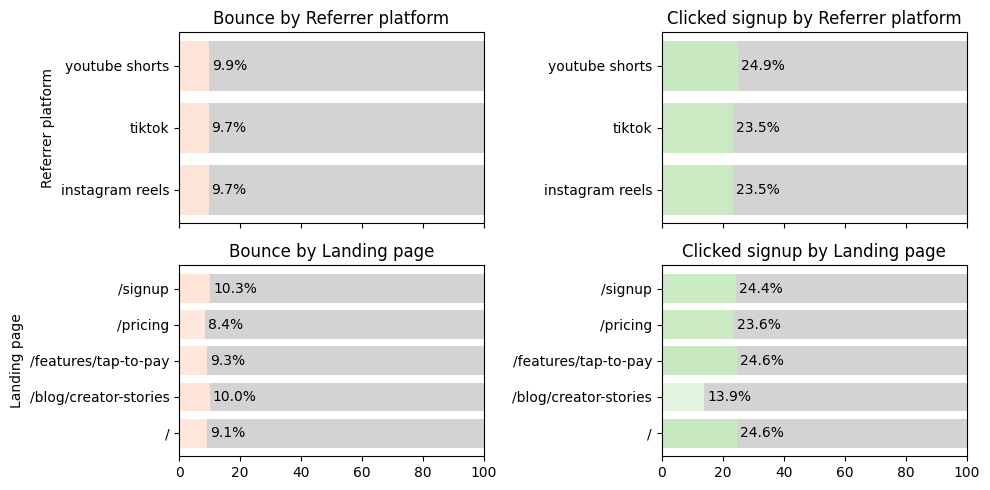

In [79]:
categorical_cols = ["referrer_platform", "landing_page"]
boolean_cols = ["bounce", "clicked_signup"]

fig, axes = plt.subplots(len(categorical_cols), len(boolean_cols), figsize=(10, 5), sharex=True)

for row_idx, cat_col in enumerate(categorical_cols):
    grouped = landing_page_df.groupby(cat_col)[boolean_cols].mean() * 100
    platforms = grouped.index.tolist()
    
    for col_idx, bool_col in enumerate(boolean_cols):
        ax = axes[row_idx, col_idx]
        values = grouped[bool_col].values
        
        # Color mapping
        colors = cm.Reds(values/100) if bool_col == "bounce" else cm.Greens(values/100) # type: ignore
        
        # Full-length background bars
        ax.barh(platforms, [100]*len(values), color="lightgrey")
        # Overlay colored portion
        ax.barh(platforms, values, color=colors)
        
        # Add percentage text
        for i, v in enumerate(values):
            ax.text(v + 1, i, f"{v:.1f}%", va='center')
        
        ax.set_xlim(0, 100)
        ax.set_title(f"{bool_col.replace('_',' ').capitalize()} by {cat_col.replace('_',' ').capitalize()}")
        if col_idx == 0:
            ax.set_ylabel(cat_col.replace('_',' ').capitalize())
        else:
            ax.set_ylabel("")
            
plt.tight_layout()
plt.show()
